In [1]:


import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv')
len(df)

11914

In [3]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [4]:
df.columns = df.columns.str.lower().str.replace(' ', '_')



In [7]:
df.dtypes[df.dtypes == 'object']

make                 object
model                object
engine_fuel_type     object
transmission_type    object
driven_wheels        object
market_category      object
vehicle_size         object
vehicle_style        object
dtype: object

In [8]:
df.dtypes[df.dtypes == 'object'].index

Index(['make', 'model', 'engine_fuel_type', 'transmission_type',
       'driven_wheels', 'market_category', 'vehicle_size', 'vehicle_style'],
      dtype='object')

In [9]:
list(df.dtypes[df.dtypes == 'object'].index)

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [13]:
string_columns = list(df.dtypes[df.dtypes == 'object'].index)
for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [14]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


In [17]:
for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique())
    print(df[col].head())

make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
48
0    bmw
1    bmw
2    bmw
3    bmw
4    bmw
Name: make, dtype: object
model
['1_series_m' '1_series' '100' '124_spider' '190-class']
914
0    1_series_m
1      1_series
2      1_series
3      1_series
4      1_series
Name: model, dtype: object
year
[2011 2012 2013 1992 1993]
28
0    2011
1    2011
2    2011
3    2011
4    2011
Name: year, dtype: int64
engine_fuel_type
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
10
0    premium_unleaded_(required)
1    premium_unleaded_(required)
2    premium_unleaded_(required)
3    premium_unleaded_(required)
4    premium_unleaded_(required)
Name: engine_fuel_type, dtype: object
engine_hp
[335. 300. 230. 320. 172.]
356
0    335.0
1    300.0
2    300.0
3    230.0
4    230.0
Name: engine_hp, dtype: float64
engine_cylinders
[ 6.  4.  5.  8. 12.]
9
0    6.0
1    6.0
2    6.0
3    6.0
4    6.0
Name: engine_cylinders, dtype:

# Exploratory data analysis


In [18]:
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

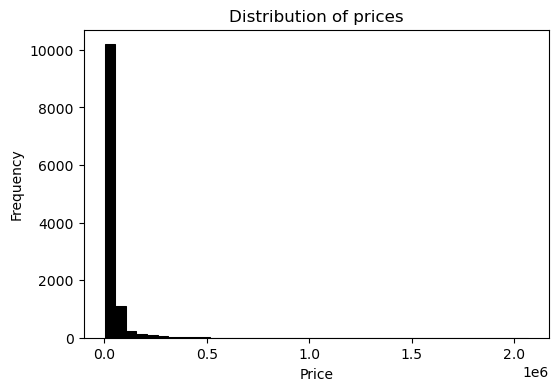

In [21]:
plt.figure(figsize=(6, 4))

sns.histplot(df.msrp, bins=40, color='black', alpha=1)

plt.ylabel('Frequency')
plt.xlabel('Price')
plt.title('Distribution of prices')

plt.show()

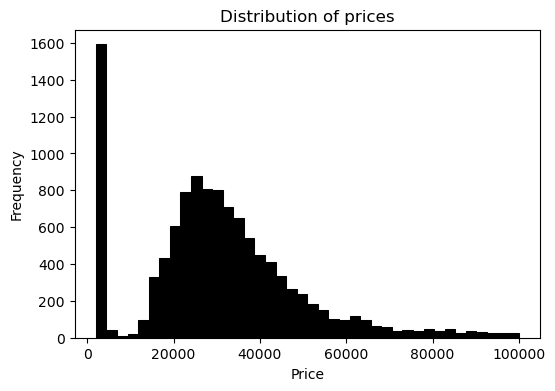

In [22]:
plt.figure(figsize=(6, 4))

sns.histplot(df.msrp[df.msrp < 1e5], bins=40, color='black', alpha=1)

plt.ylabel('Frequency')
plt.xlabel('Price')
plt.title('Distribution of prices')

plt.show()

In [23]:
np.log([1, 10, 1000, 1e5])

array([ 0.        ,  2.30258509,  6.90775528, 11.51292546])

In [24]:
np.log([1, 10, 1000, 100000])

array([ 0.        ,  2.30258509,  6.90775528, 11.51292546])

In [26]:
np.log([0, 1, 10, 1000, 100000])

/tmp/ipykernel_1930/1040805571.py:1: RuntimeWarning: divide by zero encountered in log
  np.log([0, 1, 10, 1000, 100000])


array([       -inf,  0.        ,  2.30258509,  6.90775528, 11.51292546])

In [27]:
np.log([0+1, 1+1, 10+1, 1000+1, 100000+1])

array([ 0.        ,  0.69314718,  2.39789527,  6.90875478, 11.51293546])

In [25]:
np.log1p([0, 1, 10, 1000, 100000])

array([ 0.        ,  0.69314718,  2.39789527,  6.90875478, 11.51293546])

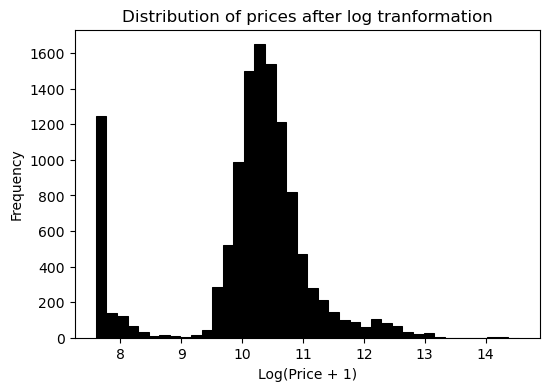

In [28]:
log_price = np.log1p(df.msrp)

plt.figure(figsize=(6, 4))

sns.histplot(log_price, bins=40, color='black', alpha=1)
plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Distribution of prices after log tranformation')

plt.show()

In [29]:
df.isnull()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
11910,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
11911,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
11912,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [30]:
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

# Setting up the validation framework

In [31]:
n = len(df)

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

In [32]:
n_val, n_test, n_train

(2382, 2382, 7150)

In [33]:
df.iloc[[0, 1, 2]]

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350


In [35]:
df.iloc[:5]

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


In [36]:
df.iloc[5:10]

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
5,bmw,1_series,2012,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,31200
6,bmw,1_series,2012,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,26,17,3916,44100
7,bmw,1_series,2012,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,39300
8,bmw,1_series,2012,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,36900
9,bmw,1_series,2013,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,27,18,3916,37200


In [40]:
idx = np.arange(n)
idx

array([    0,     1,     2, ..., 11911, 11912, 11913])

In [45]:
np.random.seed(2)
np.random.shuffle(idx)
idx

array([9111, 4268, 8848, ..., 9395, 9201, 9272])

In [46]:
df_val = df.iloc[idx[:n_val]]
df_test = df.iloc[idx[n_val:n_val+n_test]]
df_train = df.iloc[idx[n_val+n_test:]]


In [48]:
df_train.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
10447,nissan,titan,2015,regular_unleaded,317.0,8.0,automatic,rear_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,18,13,2009,32060
7280,lexus,nx_200t,2017,premium_unleaded_(required),235.0,4.0,automatic,front_wheel_drive,4.0,"crossover,luxury",midsize,4dr_suv,28,22,454,37185
6120,volkswagen,jetta,2015,regular_unleaded,115.0,4.0,automatic,front_wheel_drive,4.0,NaN,midsize,sedan,34,23,873,18425
2570,honda,civic,2016,regular_unleaded,174.0,4.0,automatic,front_wheel_drive,2.0,NaN,compact,coupe,41,31,2202,23425
4863,kia,forte,2015,regular_unleaded,145.0,4.0,automatic,front_wheel_drive,4.0,NaN,compact,sedan,39,26,1720,17490


In [51]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [52]:
np.log1p(df_train.msrp.values)

array([10.37539562, 10.52368763,  9.82151799, ..., 10.59728452,
        7.67508186,  9.97422557])

In [54]:
y_train = np.log1p(df_train.msrp.values)
y_test = np.log1p(df_test.msrp.values)
y_val = np.log1p(df_val.msrp.values)

del df_train['msrp']
del df_test['msrp']
del df_val['msrp']

In [55]:
len(y_train)

7150

# Linear regression

In [56]:
df_train.iloc[10]

make                                chevrolet
model                                    s-10
year                                     2003
engine_fuel_type     flex-fuel_(unleaded/e85)
engine_hp                               120.0
engine_cylinders                          4.0
transmission_type                      manual
driven_wheels                rear_wheel_drive
number_of_doors                           3.0
market_category                     flex_fuel
vehicle_size                          compact
vehicle_style             extended_cab_pickup
highway_mpg                                25
city_mpg                                   19
popularity                               1385
Name: 10, dtype: object

In [57]:
xi = [120.0, 19, 1385]

In [95]:
w0 = 7.17
w1 = [0.01, 0.04, 0.002]

In [78]:
def linear_regression_simple(xi):
    n = len(xi)
    pred = w0
    for j in range(n):
        pred = pred + w1[j]*xi[j]
    return pred

In [79]:
linear_regression_simple(xi)

22.700000000000003

In [80]:
np.exp(linear_regression_simple(xi)) - 1

7219127948.943205

In [81]:
np.expm1(linear_regression_simple(xi))

7219127948.943205

In [82]:
np.log1p(np.expm1(linear_regression_simple(xi)))

22.700000000000003

# Linear regression vector form

In [83]:
def dot(xi, w):
    n = len(xi)
    res = 0.0
    for j in range(n):
        res = res + w[j]*xi[j]
    return res

In [96]:
w_new = [w0] + w1

In [97]:
w_new

[7.17, 0.01, 0.04, 0.002]

In [101]:
def linear_regression2(xi):
    xi = [1] + xi
    return dot(xi, w_new)

In [99]:
x1  = [1, 148, 24, 1385]
x2  = [1, 132, 25, 2031]
x10 = [1, 453, 11, 86]

X = [x1, x2, x10]
X = np.array(X)
X

array([[   1,  148,   24, 1385],
       [   1,  132,   25, 2031],
       [   1,  453,   11,   86]])

In [100]:
X.dot(w_new)

array([12.38 , 13.552, 12.312])

In [102]:
def linear_regression(X):
    return X.dot(w_new)

# Training a linear regression model

In [133]:
X_org = [
    [148, 24, 1385],
    [132, 25, 2031],
    [453, 11, 86],
    [158, 24, 185],
    [172, 25, 201],
    [413, 11, 86],
    [38, 54, 185],
    [142, 25, 431],
    [453, 31, 86]
]

X_org = np.array(X_org)
X_org

array([[ 148,   24, 1385],
       [ 132,   25, 2031],
       [ 453,   11,   86],
       [ 158,   24,  185],
       [ 172,   25,  201],
       [ 413,   11,   86],
       [  38,   54,  185],
       [ 142,   25,  431],
       [ 453,   31,   86]])

In [134]:
ones = np.ones(X_org.shape[0])
ones

array([1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [135]:
list(np.column_stack([ones, X_org]))

[array([1.000e+00, 1.480e+02, 2.400e+01, 1.385e+03]),
 array([1.000e+00, 1.320e+02, 2.500e+01, 2.031e+03]),
 array([  1., 453.,  11.,  86.]),
 array([  1., 158.,  24., 185.]),
 array([  1., 172.,  25., 201.]),
 array([  1., 413.,  11.,  86.]),
 array([  1.,  38.,  54., 185.]),
 array([  1., 142.,  25., 431.]),
 array([  1., 453.,  31.,  86.])]

In [136]:
X = np.column_stack([ones, X_org])
X

array([[1.000e+00, 1.480e+02, 2.400e+01, 1.385e+03],
       [1.000e+00, 1.320e+02, 2.500e+01, 2.031e+03],
       [1.000e+00, 4.530e+02, 1.100e+01, 8.600e+01],
       [1.000e+00, 1.580e+02, 2.400e+01, 1.850e+02],
       [1.000e+00, 1.720e+02, 2.500e+01, 2.010e+02],
       [1.000e+00, 4.130e+02, 1.100e+01, 8.600e+01],
       [1.000e+00, 3.800e+01, 5.400e+01, 1.850e+02],
       [1.000e+00, 1.420e+02, 2.500e+01, 4.310e+02],
       [1.000e+00, 4.530e+02, 3.100e+01, 8.600e+01]])

In [137]:
y = [100, 200, 150, 250, 100, 200, 150, 250, 120]

In [138]:
XTX = X.T.dot(X)
XTX

array([[9.000000e+00, 2.109000e+03, 2.300000e+02, 4.676000e+03],
       [2.109000e+03, 6.964710e+05, 4.411500e+04, 7.185400e+05],
       [2.300000e+02, 4.411500e+04, 7.146000e+03, 1.188030e+05],
       [4.676000e+03, 7.185400e+05, 1.188030e+05, 6.359986e+06]])

In [139]:
XTX_inv = np.linalg.inv(XTX)
XTX_inv

array([[ 3.30686958e+00, -5.39612291e-03, -6.21325581e-02,
        -6.61016816e-04],
       [-5.39612291e-03,  1.11633857e-05,  8.66973393e-05,
         1.08664195e-06],
       [-6.21325581e-02,  8.66973393e-05,  1.46189255e-03,
         8.57849603e-06],
       [-6.61016816e-04,  1.08664195e-06,  8.57849603e-06,
         3.60215866e-07]])

In [140]:
XTX.dot(XTX_inv)

array([[ 1.00000000e+00, -3.46944695e-18,  0.00000000e+00,
         0.00000000e+00],
       [ 1.81898940e-12,  1.00000000e+00,  0.00000000e+00,
        -4.44089210e-16],
       [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00,
         1.38777878e-17],
       [ 0.00000000e+00, -5.32907052e-15,  1.42108547e-14,
         1.00000000e+00]])

In [141]:
XTX.dot(XTX_inv).round(1)

array([[ 1., -0.,  0.,  0.],
       [ 0.,  1.,  0., -0.],
       [ 0.,  0.,  1.,  0.],
       [ 0., -0.,  0.,  1.]])

In [144]:
w_full = XTX_inv.dot(X.T).dot(y)
w_full

array([ 3.00067767e+02, -2.27742529e-01, -2.57694130e+00, -2.30120640e-02])

In [145]:
w0 = w_full[0]
w = w_full[1:]
w0, w

(300.06776692555593, array([-0.22774253, -2.5769413 , -0.02301206]))

In [164]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    return w_full[0], w_full[1:]

In [147]:
train_linear_regression(X_org, y)

(300.06776692555593, array([-0.22774253, -2.5769413 , -0.02301206]))

# Car price baseline model

In [148]:
df_train.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
dtype: object

In [149]:
df_train.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity'],
      dtype='object')

In [150]:
base = [
    'engine_hp', 
    'engine_cylinders', 
    'highway_mpg', 
    'city_mpg', 
    'popularity'
]
df_train[base]

,engine_hp,engine_cylinders,highway_mpg,city_mpg,popularity
0,317.0,8.0,18,13,2009
1,235.0,4.0,28,22,454
2,115.0,4.0,34,23,873
3,174.0,4.0,41,31,2202
4,145.0,4.0,39,26,1720
...,...,...,...,...,...
7145,150.0,6.0,18,14,549
7146,240.0,4.0,25,19,61
7147,285.0,6.0,24,18,549
7148,120.0,4.0,23,20,481


In [152]:
X_train = df_train[base].values
X_train

array([[ 317.,    8.,   18.,   13., 2009.],
       [ 235.,    4.,   28.,   22.,  454.],
       [ 115.,    4.,   34.,   23.,  873.],
       ...,
       [ 285.,    6.,   24.,   18.,  549.],
       [ 120.,    4.,   23.,   20.,  481.],
       [ 195.,    6.,   20.,   14.,  549.]])

In [153]:
y_train

array([10.37539562, 10.52368763,  9.82151799, ..., 10.59728452,
        7.67508186,  9.97422557])

In [154]:
train_linear_regression(X_train, y_train)

(nan, array([nan, nan, nan, nan, nan]))

In [155]:
df_train[base].isnull().sum()

engine_hp           41
engine_cylinders    15
highway_mpg          0
city_mpg             0
popularity           0
dtype: int64

In [156]:
df_train[base].fillna(0).isnull().sum()

engine_hp           0
engine_cylinders    0
highway_mpg         0
city_mpg            0
popularity          0
dtype: int64

In [162]:
X_train = df_train[base].fillna(0)
X_train

,engine_hp,engine_cylinders,highway_mpg,city_mpg,popularity
0,317.0,8.0,18,13,2009
1,235.0,4.0,28,22,454
2,115.0,4.0,34,23,873
3,174.0,4.0,41,31,2202
4,145.0,4.0,39,26,1720
...,...,...,...,...,...
7145,150.0,6.0,18,14,549
7146,240.0,4.0,25,19,61
7147,285.0,6.0,24,18,549
7148,120.0,4.0,23,20,481


In [166]:
w0, w = train_linear_regression(X_train, y_train)

In [168]:
y_pred = w0 + X_train.dot(w)

<Axes: ylabel='Count'>

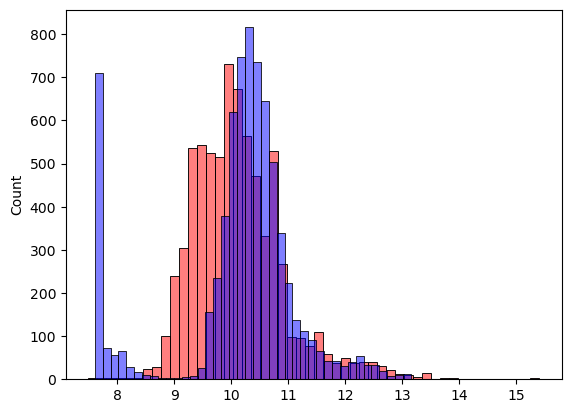

In [172]:
sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)